In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from cemba_data.tools.integration.utilities import calculate_direct_confusion
from ALLCools.plot import *
from ALLCools.plot.color import plot_colorbar
import xarray as xr

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

## Cell Meta

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

## Integration result

In [5]:
mc_integration_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithRNA/Cortex_HPF_Inh/Integration/mc_cell_tidy_data.with_integration_info.msg'
)

rna_integration_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithRNA/Cortex_HPF_Inh/Integration/rna_cell_tidy_data.with_integration_info.msg'
)

In [6]:
rna_sub_type_palette = rna_integration_data.set_index('SubType')['cluster_color'].drop_duplicates().to_dict()

## mC

In [20]:
cfm = calculate_direct_confusion(mc_integration_data[['SubType', 'co_cluster']], 
                                 rna_integration_data[['SubType', 'co_cluster']])


In [122]:
# reorder cfm
row_order = [
    'Unc5c Unc5c',
    'CGE-Lamp5 Nrxn3',
    'CGE-Lamp5 Sorcs1',
    'CGE-Lamp5 Grid1',
    'CGE-Lamp5 Dock5',
    'CGE-Lamp5 Grk5',
    'CGE-Vip Robo1',
    'CGE-Vip Ptprm',
    'CGE-Vip Ntng1',
    'CGE-Vip Ccser1',
    'CGE-Vip Grm8',
    'CGE-Vip Clstn2',
    'CGE-Vip Galnt17',
    'CGE-Vip Fstl4',
    'MGE-Pvalb Cacna1i',
    'MGE-Pvalb Sema5a',
    'MGE-Pvalb Thsd7a',
    'MGE-Pvalb Entpd3',
    'MGE-Pvalb Cnih3',
    'MGE-Pvalb Gfra2',
    'MGE-Pvalb Ptprk',
    'MGE-Sst Unc5b',
    'MGE-Sst Ptpre',
    'MGE-Sst Rxra',
    'MGE-Sst Kcnip4',
    'MGE-Sst Dock4',
    'MGE-Sst Etv1',
    'MGE-Sst Rerg',
    'MGE-Sst Ubtd1',
    'MGE-Sst Bmper',
    'MGE-Sst Frmd6',
    'MGE-Sst Chodl',
    'OLF Xkr6',
    'PAL-Inh Meis2',
    'LSX-Inh Lats2',
]

col_order = [
    'Lamp5 Lhx6_1',
    'Lamp5 Lhx6_2',
    'Lamp5 Lhx6_3',
    'Lamp5 Lhx6_4',
    'Lamp5 Lhx6_5',
    'Sncg_1',
    'Lamp5_1',
    'Lamp5_2',
    'Lamp5_3',
    'Lamp5_6',
    'Lamp5_4',
    'Lamp5_5',
    'Sncg_2',
    'Sncg_3',
    'Sncg_4',
    'Sncg_5',
    'Sncg_6',
    'Sncg_7',
    'Sncg_8',
    'Vip_7',
    'Sncg/Ndnf HPF_1',
    'Sncg/Ndnf HPF_2',
    'Sncg/Ndnf HPF_3',
    'Sncg/Ndnf HPF_4',
    'Sncg/Ndnf HPF_5',
    'Sncg/Ndnf HPF_6',
    'Serpinf1_1',
    'Serpinf1_2',
    'Vip_1',
    'Vip_2',
    'Vip_3',
    'Vip_4',
    'Vip_5',
    'Vip_6',
    'Vip_8',
    'Vip_16',
    'Vip_17',
    'Vip_12',
    'Vip_13',
    'Vip_14',
    'Vip_15',
    'Vip_9',
    'Vip_10',
    'Vip_11',
    'Serpinf1_3',
    'Pvalb_9',
    'Pvalb_7',
    'Pvalb_8',
    'Pvalb_6',
    'Pvalb_5',
    'Pvalb_4',
    'Pvalb_1',
    'Pvalb_3',
    'Sst_6',
    'Sst_29',
    'Pvalb_11',
    'Pvalb_12',
    'Sst_7',
    'Sst_1',
    'Sst_2',
    'Sst_3',
    'Sst_4',
    'Sst_5',
    'Sst_24',
    'Sst_25',
    'Sst_26',
    'Sst_27',
    'Sst_9',
    'Sst_10',
    'Sst_11',
    'Sst_13',
    'Sst_14',
    'Sst_15',
    'Sst_23',
    'Sst_8',
    'Sst_16',
    'Sst_17',
    'Sst_28',
    'Sst_12',
    'Sst_20',
    'Sst_18',
    'Sst_19',
    'Sst_21',
    'Sst_22',
    'Sst Chodl_1',
    'Sst Chodl_2',
    'Meis2_1',
    'Meis2_2',
    'Meis2_3',
    'PIR Six3',
]

cfm = cfm.loc[row_order, col_order]

In [123]:
# prepare legend
from matplotlib.colors import LinearSegmentedColormap

row_legend_data = []
row_legend_color = []

for i, cluster in enumerate(cfm.index):
    row_legend_data.append(i)
    row_legend_color.append(sub_type_palette[cluster])
row_legend_palette = LinearSegmentedColormap.from_list('mc', row_legend_color)

col_legend_data = []
col_legend_color = []

for i, cluster in enumerate(cfm.columns):
    col_legend_data.append(i)
    col_legend_color.append(rna_sub_type_palette[cluster])
col_legend_palette = LinearSegmentedColormap.from_list('rna', col_legend_color)

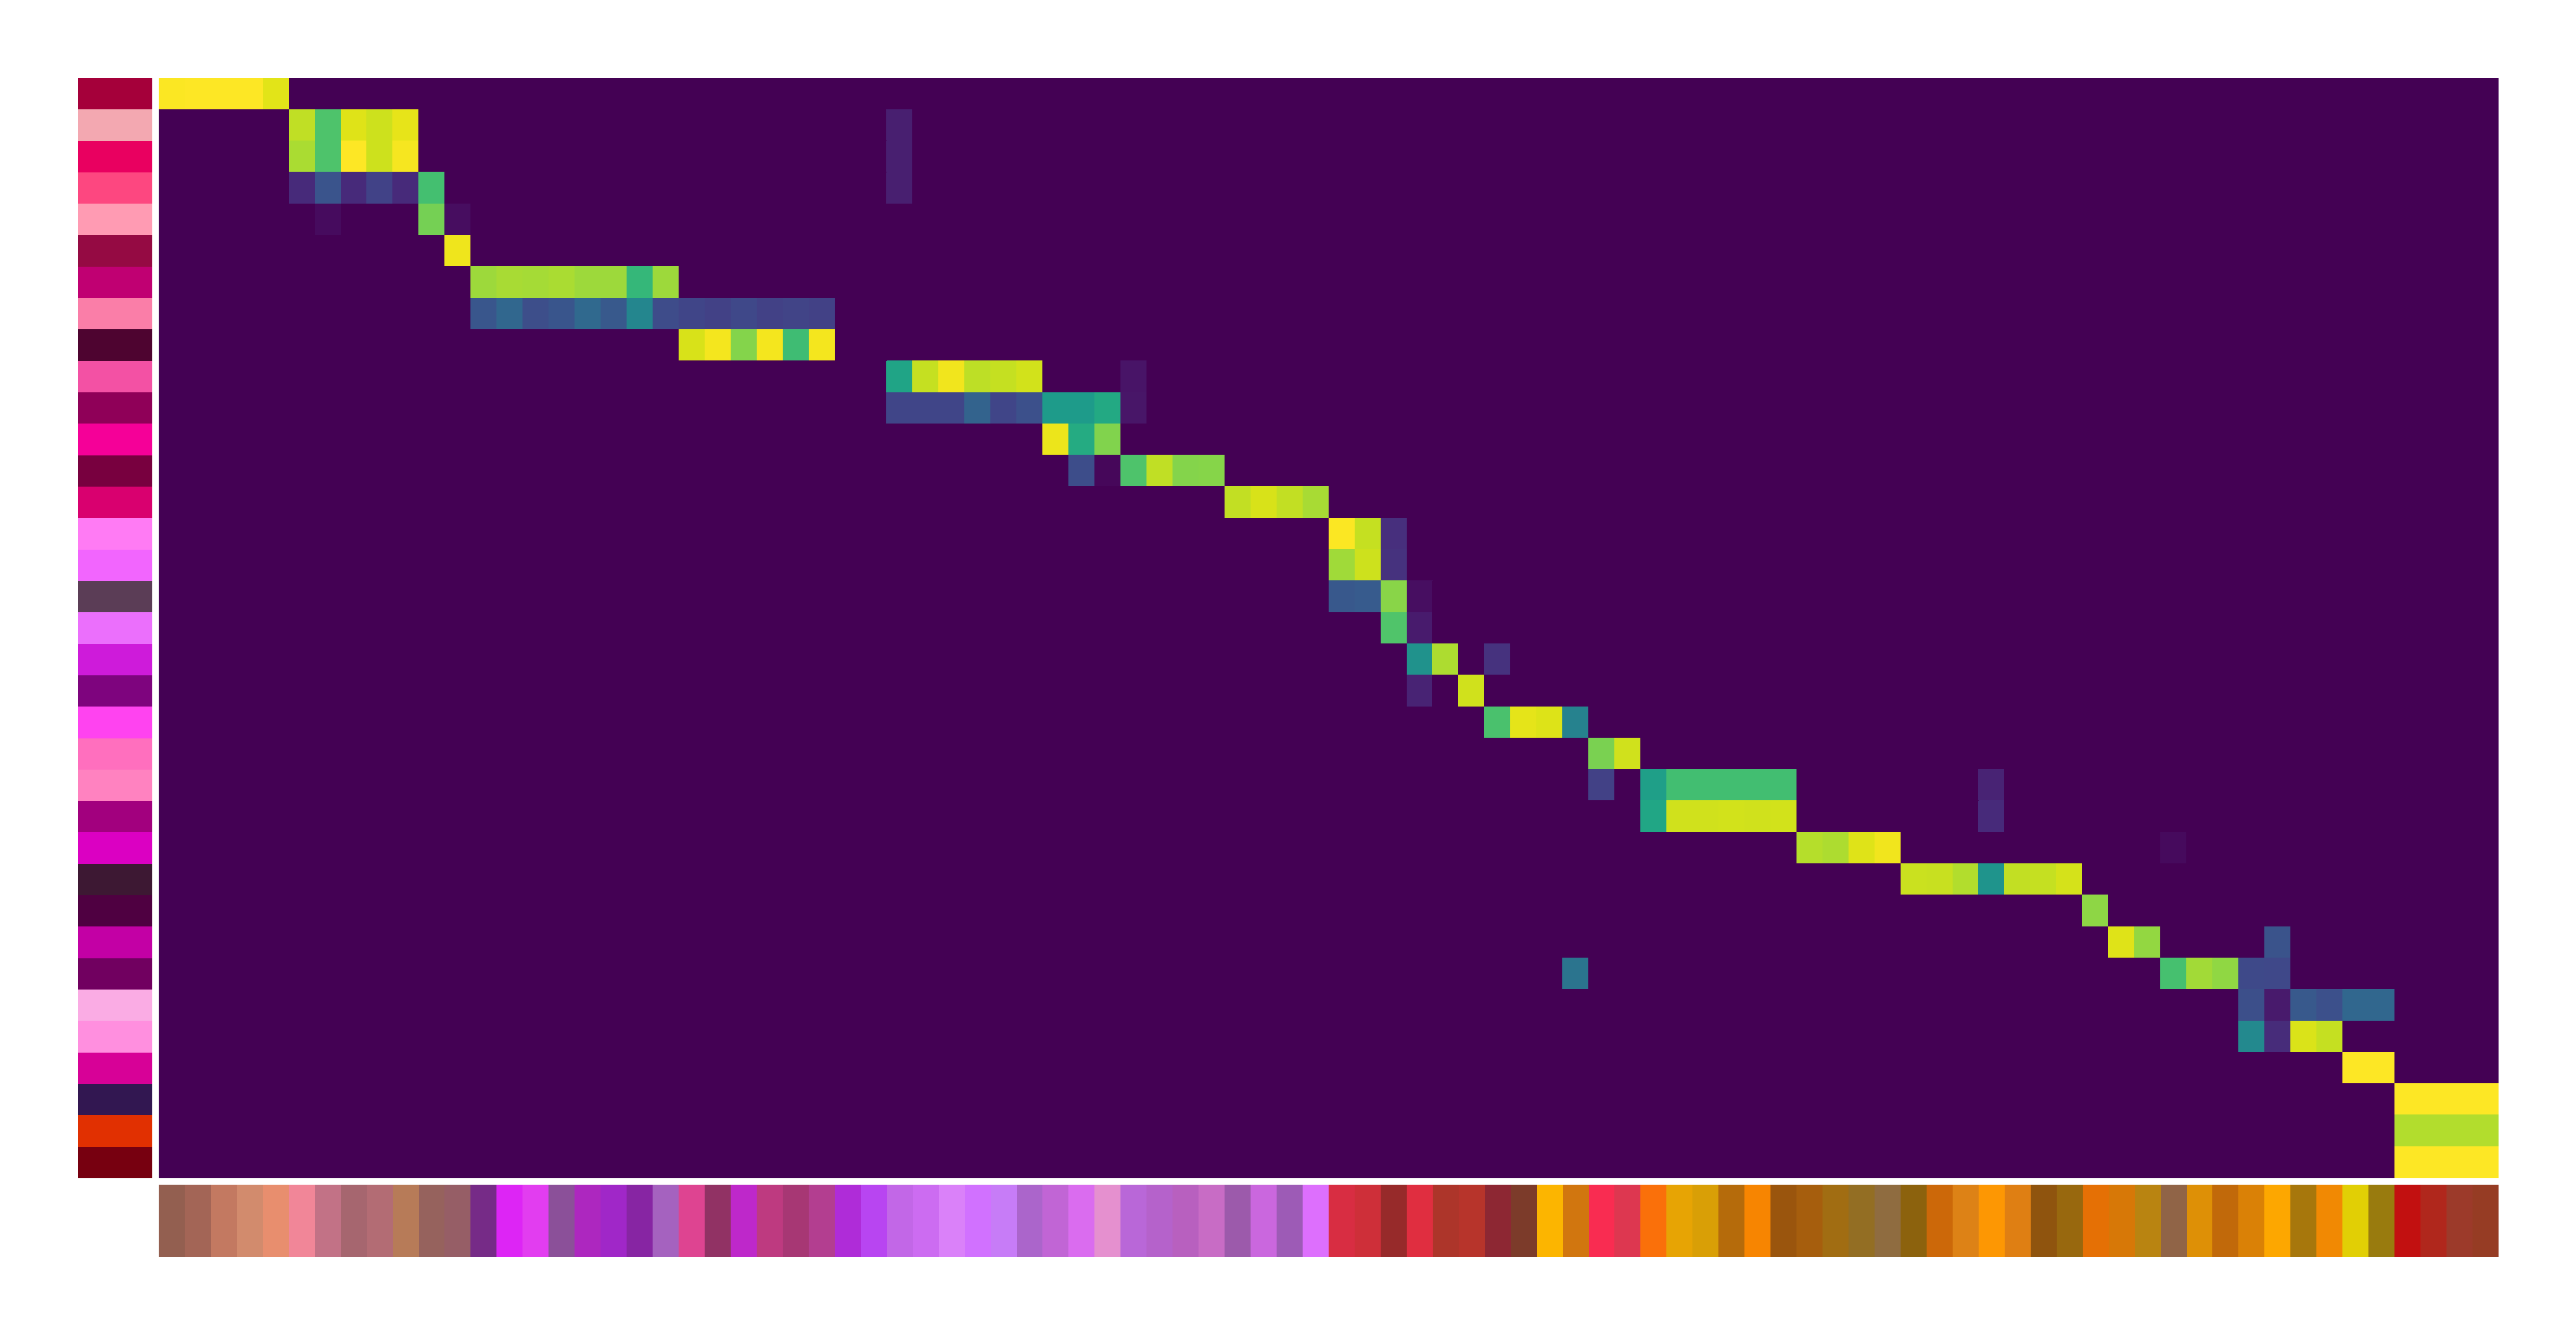

In [138]:
fig = plt.figure(figsize=(4, 2), dpi=1200)
gs = fig.add_gridspec(30, 60)

# heatmap
ax_heatmap = fig.add_subplot(gs[:-2, 2:])
sns.heatmap(cfm, cbar=False, ax=ax_heatmap, 
            cmap='viridis', vmin=0.2, vmax=1)
ax_heatmap.set(xticks=[], yticks=[], xlabel='', ylabel='')


# row legend
ax_row_legend = fig.add_subplot(gs[:-2, :2])
ax_row_legend.imshow(np.array(row_legend_data).reshape(len(row_legend_data), 1),
                     cmap=row_legend_palette, aspect='auto')
#ax_row_legend.set_ylabel('Methylome Subtypes', fontsize=labelsize)
ax_row_legend.set(xticks=[], yticks=[])
sns.despine(ax=ax_row_legend, left=True, bottom=True)

# col legend
ax_col_legend = fig.add_subplot(gs[-2:, 2:])
ax_col_legend.imshow(np.array(col_legend_data).reshape(1, len(col_legend_data)), 
                     cmap=col_legend_palette, aspect='auto')
#ax_col_legend.set_xlabel('Transcriptome Subtypes', fontsize=labelsize)
ax_col_legend.set(xticks=[], yticks=[])
sns.despine(ax=ax_col_legend, left=True, bottom=True)

fig.savefig('ConfusionMatrix.png')

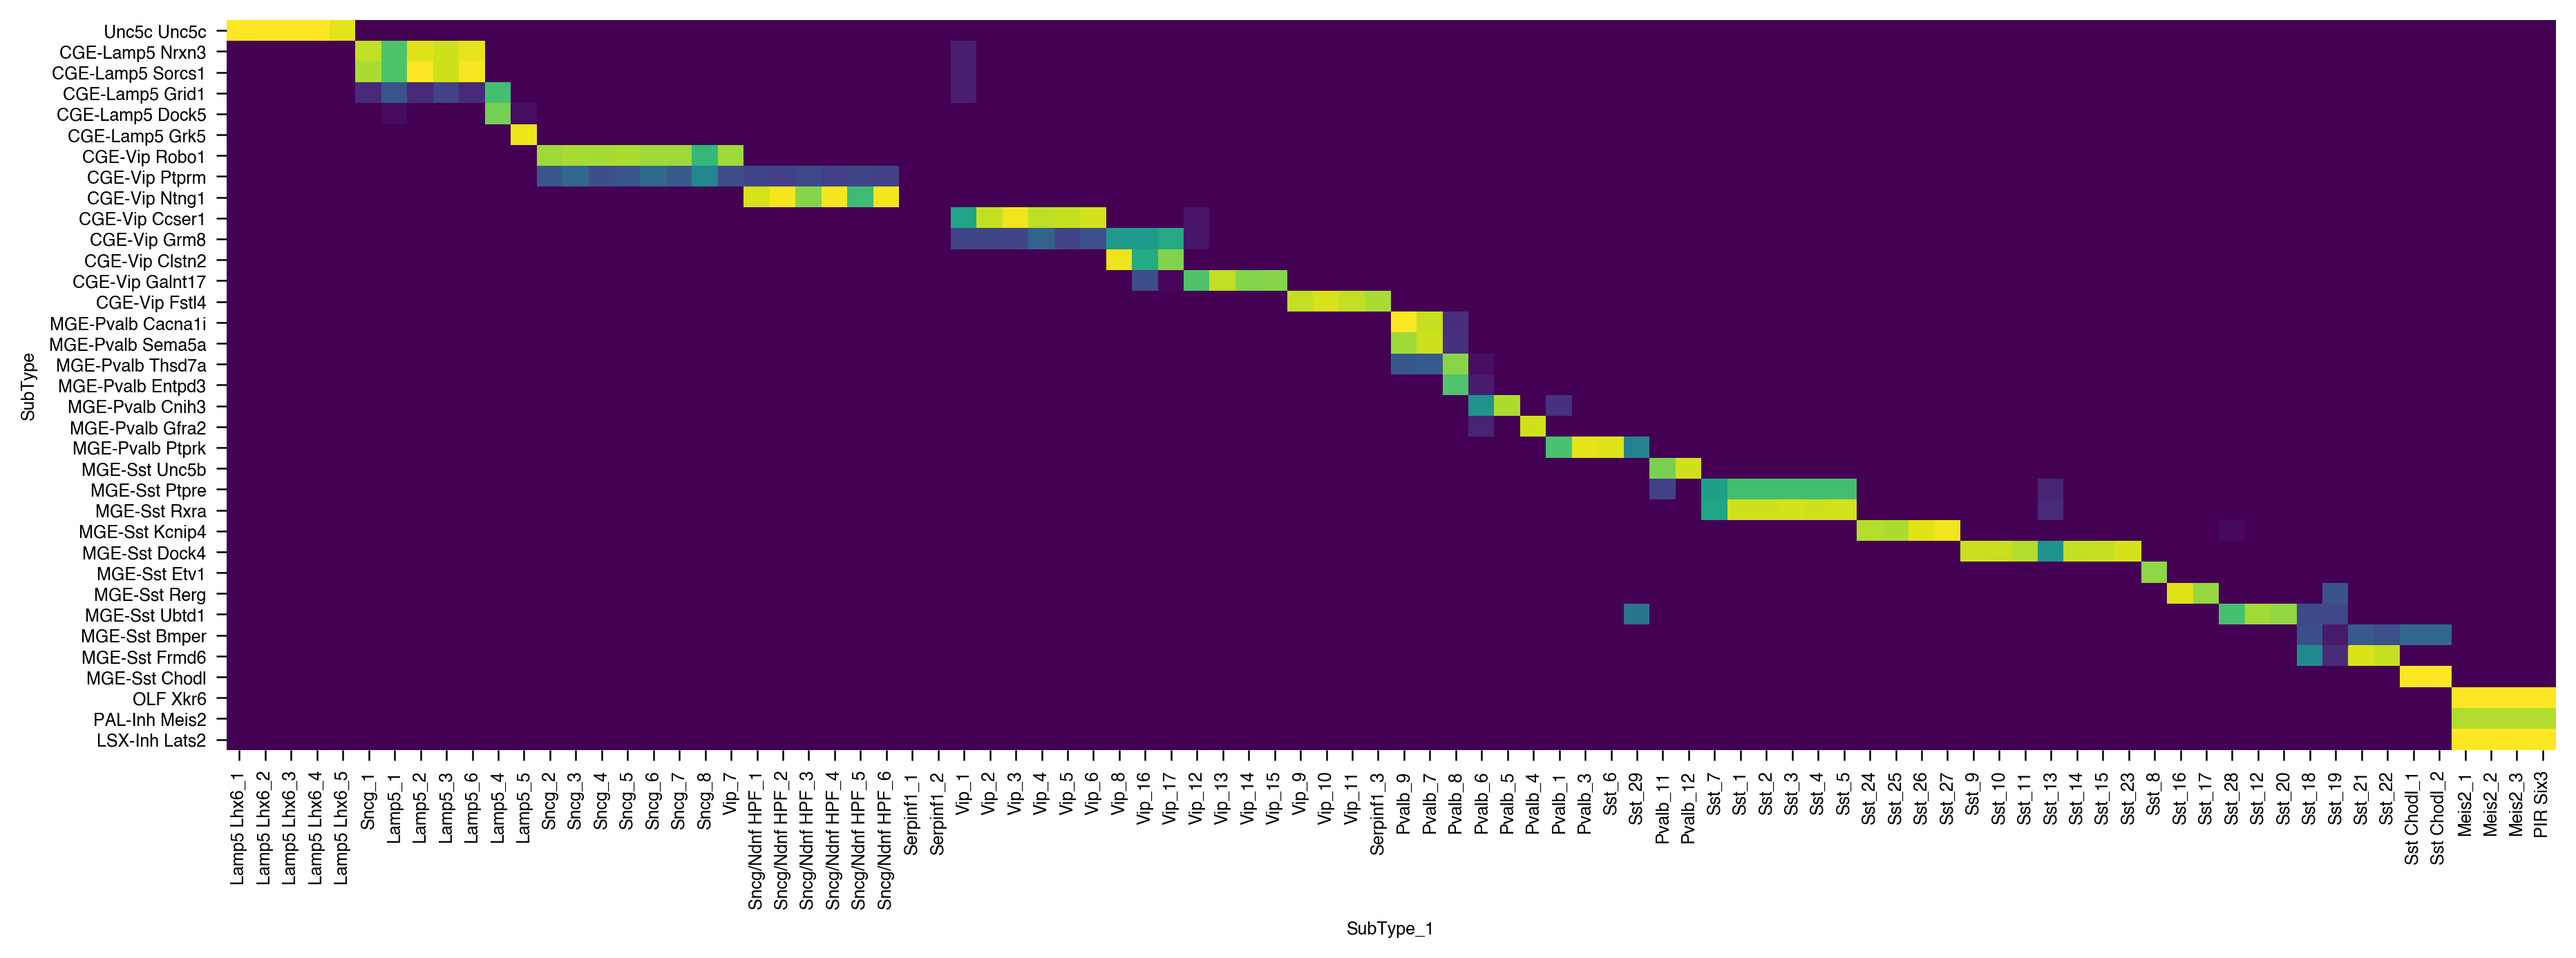

In [141]:
fig = plt.figure(figsize=(15, 5), dpi=300)
gs = fig.add_gridspec(30, 60)

# heatmap
ax_heatmap = fig.add_subplot(gs[:-2, 2:])
sns.heatmap(cfm, cbar=False, ax=ax_heatmap, 
            cmap='viridis', vmin=0.2, vmax=1)
# ax_heatmap.set(xticks=[], yticks=[], xlabel='', ylabel='')

# # row legend
# ax_row_legend = fig.add_subplot(gs[:-2, :2])
# ax_row_legend.imshow(np.array(row_legend_data).reshape(len(row_legend_data), 1),
#                      cmap=row_legend_palette, aspect='auto')
# #ax_row_legend.set_ylabel('Methylome Subtypes', fontsize=labelsize)
# ax_row_legend.set(xticks=[], yticks=[])
# sns.despine(ax=ax_row_legend, left=True, bottom=True)
# 
# # col legend
# ax_col_legend = fig.add_subplot(gs[-2:, 2:])
# ax_col_legend.imshow(np.array(col_legend_data).reshape(1, len(col_legend_data)), 
#                      cmap=col_legend_palette, aspect='auto')
# #ax_col_legend.set_xlabel('Transcriptome Subtypes', fontsize=labelsize)
# ax_col_legend.set(xticks=[], yticks=[])
# sns.despine(ax=ax_col_legend, left=True, bottom=True)

fig.savefig('ConfusionMatrix.with_label.pdf')